# which algorithms are sensetive to outlier

Hierarchiel Algorithm---------------Sensitive

PCA---------------Sensitive

K-Means---------------Sensitive

Nural Network---------------Sensitive

Linear Regression---------------Sensitive

Logistic Regression---------------Sensitive


======================================================================================

Decision Tree Classifier and Regressor---------------Not Sensitive

Ensamble--Random Forest,xgboost,gradientboosting---------------Not Sensitive

KNN---------------Not Sensitive

Naive Bayes Classifier---------------Not Sensitive

SVM---------------Not Sensitive

In [1]:
import pandas as pd
import numpy as np

In [2]:
file=pd.read_csv('titanic.csv')

In [3]:
file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
file.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
import seaborn as sns

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

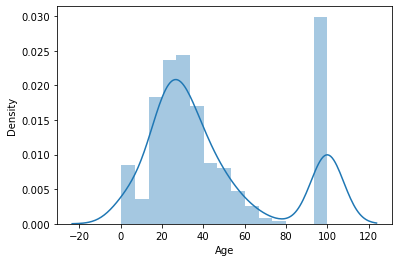

In [7]:
sns.distplot(file['Age'].fillna(100))

# Gausian Distribution

Text(0.5, 1.0, 'Age Count')

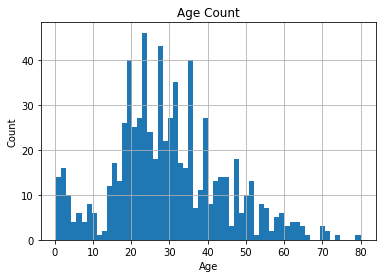

In [8]:
figure=file.Age.hist(bins=60)
figure.set_xlabel('Age')
figure.set_ylabel('Count')
figure.set_title('Age Count')

Finding Outliers

<AxesSubplot:>

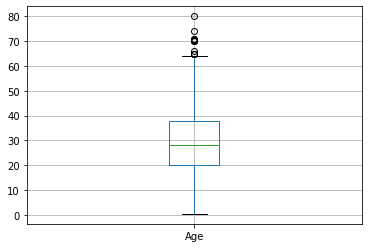

In [9]:
file.boxplot(column='Age')
#above 65 to 80 there are outliers

# Lets Check in a detailed way

In [10]:
file['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

# As it is a Gausian Data so we need to find upper and lower boundary

# Above 73 All Are Outliers

In [11]:
#lets take upto 3rd standard deviation from both side
upper_boundary=file['Age'].mean() + 3*file['Age'].std()
lower_boundary=file['Age'].mean() - 3*file['Age'].std()

In [12]:
upper_boundary

73.27860964406095

In [13]:
lower_boundary

-13.88037434994331

In [14]:
#Lets Find Inter quartile Range means The range from 25% to 75%
IQR= file['Age'].quantile(0.75) - file['Age'].quantile(0.25)

In [15]:
IQR

17.875

In [16]:
upper_bridge=file['Age'].quantile(0.75) + (IQR*1.5)
lower_bridge=file['Age'].quantile(0.25) - (IQR*1.5)

In [17]:
upper_bridge

64.8125

In [18]:
lower_bridge

-6.6875

# Another Outliers in Fare Column

<AxesSubplot:>

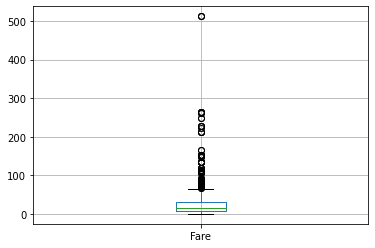

In [19]:
file.boxplot('Fare')

# Right Skewed Data

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

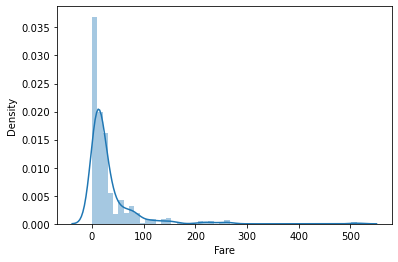

In [20]:
sns.distplot(file.Fare)

Text(0.5, 1.0, 'Fare Count')

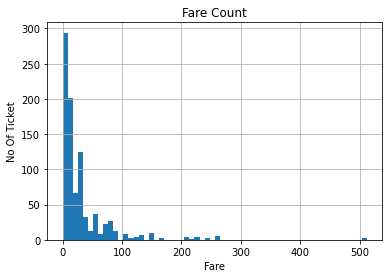

In [21]:
figure=file.Fare.hist(bins=60)
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Ticket')
figure.set_title('Fare Count')

In [22]:
file.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
upper_boundary1=file['Fare'].mean() + 3*file['Fare'].std()
lower_boundary1=file['Fare'].mean() - 3*file['Fare'].std()

In [24]:
upper_boundary1

181.2844937601173

In [25]:
lower_boundary1

-116.87607782296811

In [26]:
IQR1=file['Fare'].quantile(0.75) - file['Fare'].quantile(0.25)

In [27]:
IQR1

23.0896

# As it is a Right Skewed Data so we need to find upper and lower bridge

# Above 100 there is a outlier

In [28]:
upper_bridge1=file['Fare'].quantile(0.75) + (IQR1*3)
lower_bridge1=file['Fare'].quantile(0.25) - (IQR1*3)

In [29]:
upper_bridge1

100.2688

In [30]:
lower_bridge1

-61.358399999999996

# Now Fixing All Outliers in AGE

In [31]:
data=file.copy()

In [32]:
data.loc[data['Age']>73]=73

In [33]:
data.Age.max()

73.0

# Now Fixing All Outliers in Fare

In [34]:
data.Fare.loc[data['Fare']>100]=100

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [35]:
data.Fare.max()

100.0

# Lets Check In describe Mode

In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,444.499439,0.546577,2.468013,29.687913,0.686869,0.545455,27.148634
std,257.522293,3.472657,3.449774,14.490589,3.604560,3.531704,27.375435
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,891.000000,73.000000,73.000000,73.000000,73.000000,73.000000,100.000000


# Now lets Plot

Text(0.5, 1.0, 'Fare Count')

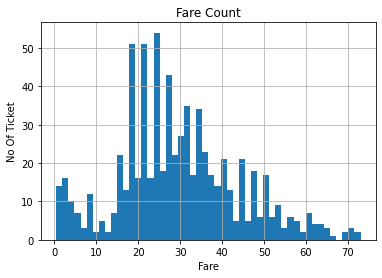

In [37]:
figure=data.Age.hist(bins=50)
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Ticket')
figure.set_title('Fare Count')

Text(0.5, 1.0, 'Fare Count')

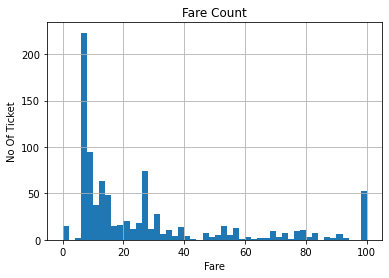

In [38]:
figure=data.Fare.hist(bins=50)
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Ticket')
figure.set_title('Fare Count')

# Lets do Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [48]:
x=pd.DataFrame(data[['Age','Fare']].fillna(50))

In [49]:
x

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,50.0,23.4500
889,26.0,30.0000


In [50]:
y=data['Survived']

In [54]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [56]:
lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_predict=lr.predict(x_test)
y_predict1=lr.predict_proba(x_test)

In [61]:
from sklearn.metrics import accuracy_score,roc_auc_score

In [70]:
print("Accuracy Score is:- \n",accuracy_score(y_test,y_predict))
print("\nROC_AUC Score is:- \n",roc_auc_score(y_test,y_predict1[:,1]))

Accuracy Score is:- 
 0.664804469273743

ROC_AUC Score is:- 
 0.7673101673101673


# Lets Do Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc=RandomForestClassifier()

In [73]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [75]:
y_pred=rfc.predict(x_test)
y_pred1=rfc.predict_proba(x_test)

In [76]:
print("Accuracy Score is:- \n",accuracy_score(y_test,y_pred))
print("\nROC_AUC Score is:- \n",roc_auc_score(y_test,y_pred1[:,1]))

Accuracy Score is:- 
 0.6703910614525139

ROC_AUC Score is:- 
 0.7086872586872587
